In [1]:
import pickle

with open('data/results_for_h_omm_with_snecov_correct_obh2_marginalH0.pkl', 'rb') as f:
    loaded_results = pickle.load(f)

h0_min_sne = loaded_results["h0_min_sne"]
omm_min_sne = loaded_results["omm_min_sne"]
h0_std_sne = loaded_results["h0_std_sne"]
omm_std_sne = loaded_results["omm_std_sne"]
h0_min_bao = loaded_results["h0_min_bao"]
omm_min_bao = loaded_results["omm_min_bao"]
h0_std_bao = loaded_results["h0_std_bao"]
omm_std_bao = loaded_results["omm_std_bao"]
h0_min_cmb = loaded_results["h0_min_cmb"]
omm_min_cmb = loaded_results["omm_min_cmb"]
h0_std_cmb = loaded_results["h0_std_cmb"]
omm_std_cmb = loaded_results["omm_std_cmb"]
param = loaded_results["param"]


In [2]:
omm_oringinal_list_with_cmb = []
for i in range (len(h0_min_sne)):
    omm_oringinal_with_cmb = param[i][2]
    omm_oringinal_list_with_cmb.append(omm_oringinal_with_cmb)

Peak KDE $w_0w_a$ public chain $= 0.33$
Peak for SNe: x = 0.3575, y = 1.0000
Peak for BAO: x = 0.3025, y = 1.0000
Peak for CMB: x = 0.3205, y = 1.0000


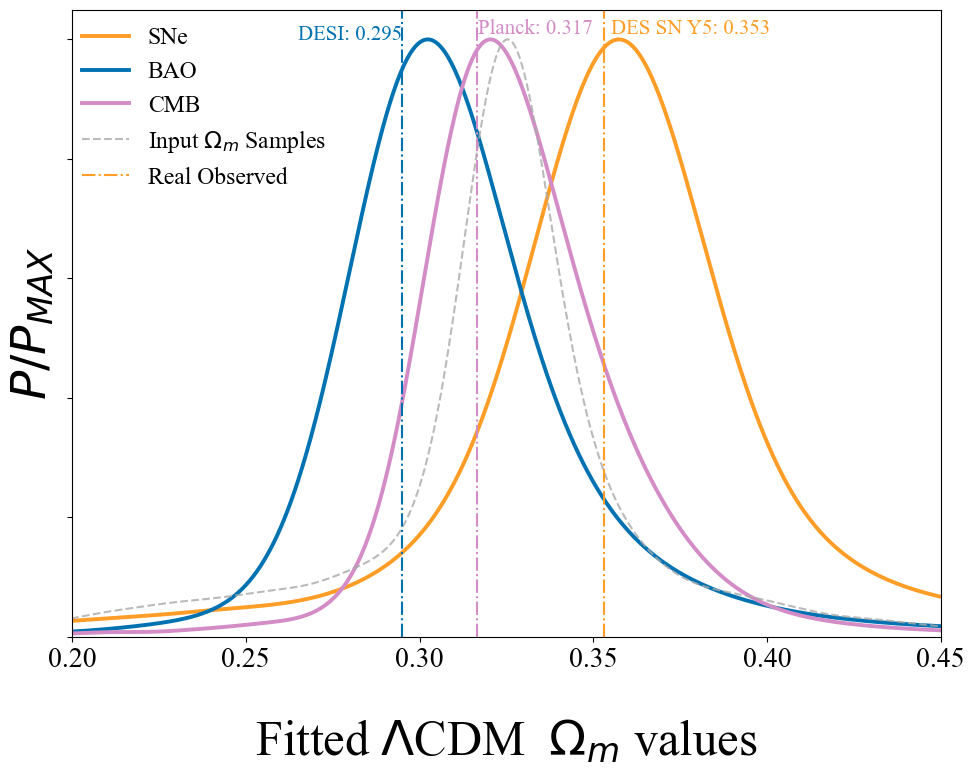

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import gaussian_kde

import pickle
x = np.linspace(0.1, 0.6, 1500)

omm_oringinal_with_cmb_array = np.array(omm_oringinal_list_with_cmb)
omm_oringinal_array = omm_oringinal_with_cmb_array[np.isfinite(omm_oringinal_with_cmb_array)]
kde_omm_oringinal = gaussian_kde(omm_oringinal_array)
peak_omm_oringinal = x[np.argmax(kde_omm_oringinal(x))]

print(f"Peak KDE $w_0w_a$ public chain $= {peak_omm_oringinal:.2f}$")

def calculate_om0_distributions(x, omm_min, omm_std, label, color):
    total_distribution = np.zeros_like(x)
    for mu, sigma in zip(omm_min, omm_std):
        if not np.isnan(mu) and not np.isnan(sigma):
            total_distribution += norm.pdf(x, mu, sigma)
    total_distribution /= np.max(total_distribution)
    plt.plot(x, total_distribution, label=label, color=color, linewidth=2.8)
    peak_index = np.argmax(total_distribution)
    peak_x_value = x[peak_index]
    peak_y_value = total_distribution[peak_index]
    print(f"Peak for {label}: x = {peak_x_value:.4f}, y = {peak_y_value:.4f}")


    return total_distribution
plt.figure(figsize=(10, 8))


plt.rc('font', family='serif', serif='Times New Roman', size=15)
plt.rcParams['axes.labelsize'] = 15


sne_distribution = calculate_om0_distributions(x, omm_min_sne, omm_std_sne, label='SNe', color='#ff9d27')
bao_distribution = calculate_om0_distributions(x, omm_min_bao, omm_std_bao, label='BAO', color='#0072B2')
cmb_distribution = calculate_om0_distributions(x, omm_min_cmb, omm_std_cmb, label='CMB', color='#d38cc6')

#sne_distribution = calculate_om0_distributions(x, h0_min_sne, h0_std_sne, label='SNe', color='blue')
#bao_distribution = calculate_om0_distributions(x, h0_min_bao, h0_std_bao, label='BAO', color='orange')
#cmb_distribution = calculate_om0_distributions(x, h0_min_cmb, h0_std_cmb, label='CMB', color='green')
plt.plot(x, kde_omm_oringinal(x)/kde_omm_oringinal(peak_omm_oringinal), color='#A9A9A9', linestyle='--',
        label=r"Input $\Omega_m$ Samples", alpha=0.8)

plt.axvline(0.353, color='#ff9d27', linestyle='dashdot', linewidth=1.5, label='Real Observed')
plt.text(0.355, max(sne_distribution)*1.01, 'DES SN Y5: 0.353', color='#ff9d27')

plt.axvline(0.295, color='#0072B2', linestyle='dashdot', linewidth=1.5)
plt.text(0.265, max(bao_distribution), 'DESI: 0.295', color='#0072B2')

plt.axvline(0.3166, color='#d38cc6', linestyle='dashdot', linewidth=1.5)
plt.text(0.3168, max(cmb_distribution)*1.01, 'Planck: 0.317', color='#d38cc6' )

plt.xlim(0.2, 0.45)
#plt.xlabel('$\Lambda$CDM test\'s $\Omega_{m}$ values\n(Planck+eBoss+DESY5+3x2pt)')
plt.xlabel('Fitted $\Lambda$CDM  $\Omega_{m}$ values', fontsize=35,)
plt.ylabel('$P/P_{MAX}$', fontsize=35)
plt.gca().xaxis.set_label_coords(0.5, -0.13)
#plt.text(0.5, -0.18, r'(Planck+eBoss+DESY5+3x2pt $w_0w_a$ chain)', fontsize=14, ha='center', transform=plt.gca().transAxes)
plt.ylim(0, None)
plt.tick_params(axis='x', labelsize=20)


legend = plt.legend(fontsize=17, loc=(0,0.7))
plt.gca().axes.set_yticklabels([])

legend.get_frame().set_linewidth(0)  # Remove the box outline
legend.get_frame().set_facecolor('none')
plt.grid(False)
plt.tight_layout()
plt.savefig("w0wa_to_lcdm_all_correct_bbn.png", dpi=400, bbox_inches='tight')

plt.show()

In [4]:
h0_oringinal_list_with_cmb = []
for i in range (len(h0_min_sne)):
    h0_oringinal_with_cmb = param[i][3]
    h0_oringinal_list_with_cmb.append(h0_oringinal_with_cmb)

Peak KDE $H_0$ public chain $= 66.37$
Peak for BAO: x = 67.72, y = 0.2842
Peak for CMB: x = 66.76, y = 0.2188
68% interval for BAO: 65.74 - 68.82
68% interval for CMB: 64.15 - 68.02


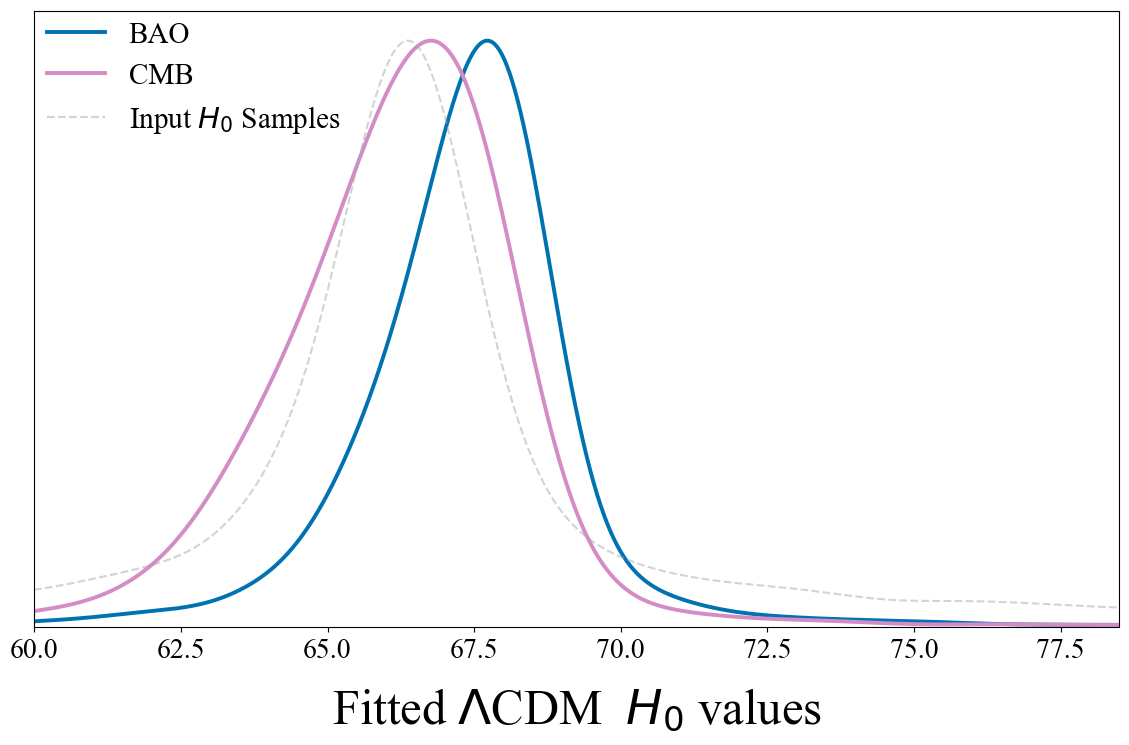

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

h0_min_bao_all = np.array(h0_min_bao)
h0_min_cmb_with_cmb = np.array(h0_min_cmb)
h0_oringinal_array = np.array(h0_oringinal_list_with_cmb)

ho_std_bao = np.array(h0_std_bao)
ho_std_cmb = np.array(h0_std_cmb)

h0_min_bao_all = h0_min_bao_all[np.isfinite(h0_min_bao_all)]
h0_min_cmb_with_cmb = h0_min_cmb_with_cmb[np.isfinite(h0_min_cmb_with_cmb)]
h0_bao_std = ho_std_bao[np.isfinite(ho_std_bao)]
h0_cmb_std = ho_std_cmb[np.isfinite(ho_std_cmb)]
h0_oringinal_array = h0_oringinal_array[np.isfinite(h0_oringinal_array)]

kde_bao = gaussian_kde(h0_min_bao_all)
kde_cmb_with_cmb = gaussian_kde(h0_min_cmb_with_cmb)
kde_h0_oringinal = gaussian_kde(h0_oringinal_array)

x_values = np.linspace(50, 80, 2000)

h0_min_bao_all = np.array(h0_min_bao)
h0_min_cmb_with_cmb = np.array(h0_min_cmb)
h0_original_array = np.array(h0_oringinal_list_with_cmb)

h0_std_bao = np.array(ho_std_bao)
h0_std_cmb = np.array(ho_std_cmb)

h0_min_bao_all = h0_min_bao_all[np.isfinite(h0_min_bao_all)]
h0_min_cmb_with_cmb = h0_min_cmb_with_cmb[np.isfinite(h0_min_cmb_with_cmb)]
h0_bao_std = h0_std_bao[np.isfinite(h0_std_bao)]
h0_cmb_std = h0_std_cmb[np.isfinite(h0_std_cmb)]
h0_original_array = h0_original_array[np.isfinite(h0_original_array)]


kde_h0_original = gaussian_kde(h0_original_array)
peak_h0_original = x_values[np.argmax(kde_h0_original(x_values))]
print(f"Peak KDE $H_0$ public chain $= {peak_h0_original:.2f}$")

def calculate_h0_distributions(x, h0_min, h0_std, label, color):
    total_distribution = np.zeros_like(x)
    for mu, sigma in zip(h0_min, h0_std):
        if not np.isnan(mu) and not np.isnan(sigma):
            total_distribution += norm.pdf(x, mu, sigma)
    dx = x[1] - x[0]
    area = np.sum(total_distribution) * dx
    total_distribution /= area
    total_distribution_plot = total_distribution / np.max(total_distribution)
    plt.plot(x, total_distribution_plot, label=label, color=color, linewidth=2.8)
    peak_index = np.argmax(total_distribution)
    peak_x_value = x[peak_index]
    peak_y_value = total_distribution[peak_index]
    print(f"Peak for {label}: x = {peak_x_value:.2f}, y = {peak_y_value:.4f}")
    return total_distribution

plt.figure(figsize=(14, 8))

bao_distribution = calculate_h0_distributions(
    x_values, h0_min_bao_all, h0_bao_std,
    label=r'BAO', color='#0072B2'
)
cmb_distribution = calculate_h0_distributions(
    x_values, h0_min_cmb_with_cmb, h0_cmb_std,
    label=r'CMB', color='#d38cc6'
)

# Compute CDF and 68% intervals for BAO
dx = x_values[1] - x_values[0]
cdf_bao = np.cumsum(bao_distribution) * dx
lower_idx_bao = np.argmax(cdf_bao >= 0.16)
upper_idx_bao = np.argmax(cdf_bao >= 0.84)
x_lower_bao, x_upper_bao = x_values[lower_idx_bao], x_values[upper_idx_bao]
print(f"68% interval for BAO: {x_lower_bao:.2f} - {x_upper_bao:.2f}")

# Compute CDF and 68% intervals for CMB
cdf_cmb = np.cumsum(cmb_distribution) * dx
lower_idx_cmb = np.argmax(cdf_cmb >= 0.16)
upper_idx_cmb = np.argmax(cdf_cmb >= 0.84)
x_lower_cmb, x_upper_cmb = x_values[lower_idx_cmb], x_values[upper_idx_cmb]
print(f"68% interval for CMB: {x_lower_cmb:.2f} - {x_upper_cmb:.2f}")

# Plot the 68% confidence intervals
# plt.fill_between(
#     x_values[lower_idx_bao:upper_idx_bao+1],
#     (bao_distribution / np.max(bao_distribution))[lower_idx_bao:upper_idx_bao+1],
#     color='#3D65A5', alpha=0.1
# )
# plt.fill_between(
#     x_values[lower_idx_cmb:upper_idx_cmb+1],
#     (cmb_distribution / np.max(cmb_distribution))[lower_idx_cmb:upper_idx_cmb+1],
#     color='#E57A77', alpha=0.1
# )

kde_original = kde_h0_original(x_values)
kde_original_plot = kde_original / np.max(kde_original)
plt.plot(
    x_values, kde_original_plot,
    color='#A9A9A9', linestyle='--', label=r"Input $H_0$ Samples", alpha=0.5
)

#plt.axvline(68.53, color='#0072B2', linestyle='--',linewidth=1.5,)
            #label=rf'Peak KDE BAO $= {peak_bao:.2f}$')
#plt.axvline(67.27, color='#d38cc6', linestyle='--',linewidth=1.5 )
           # label=rf'Peak KDE CMB $= {peak_cmb_with_cmb:.2f}$')

plt.xlim(60, 78.5)
plt.xlabel('Fitted $\Lambda$CDM  $H_0$ values', fontsize=35)
plt.ylabel('$P/P_{MAX}$', fontsize=20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.tick_params(axis='x', labelsize=20)

plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.set_yticklabels([])

legend =plt.legend(fontsize=21, loc=(0.001, 0.78))
legend.get_frame().set_linewidth(0)  # Remove the box outline
legend.get_frame().set_facecolor('none')
plt.grid(False)
plt.ylim(0, None)

plt.savefig("H0_cmb_bao_correct_bbn.png", dpi=400, bbox_inches='tight')
plt.show()


5969 5969 5969 5969
Peak of the KDE: x = 0.9399, y = 0.6025
68% confidence interval: 0.5395 to 2.0450


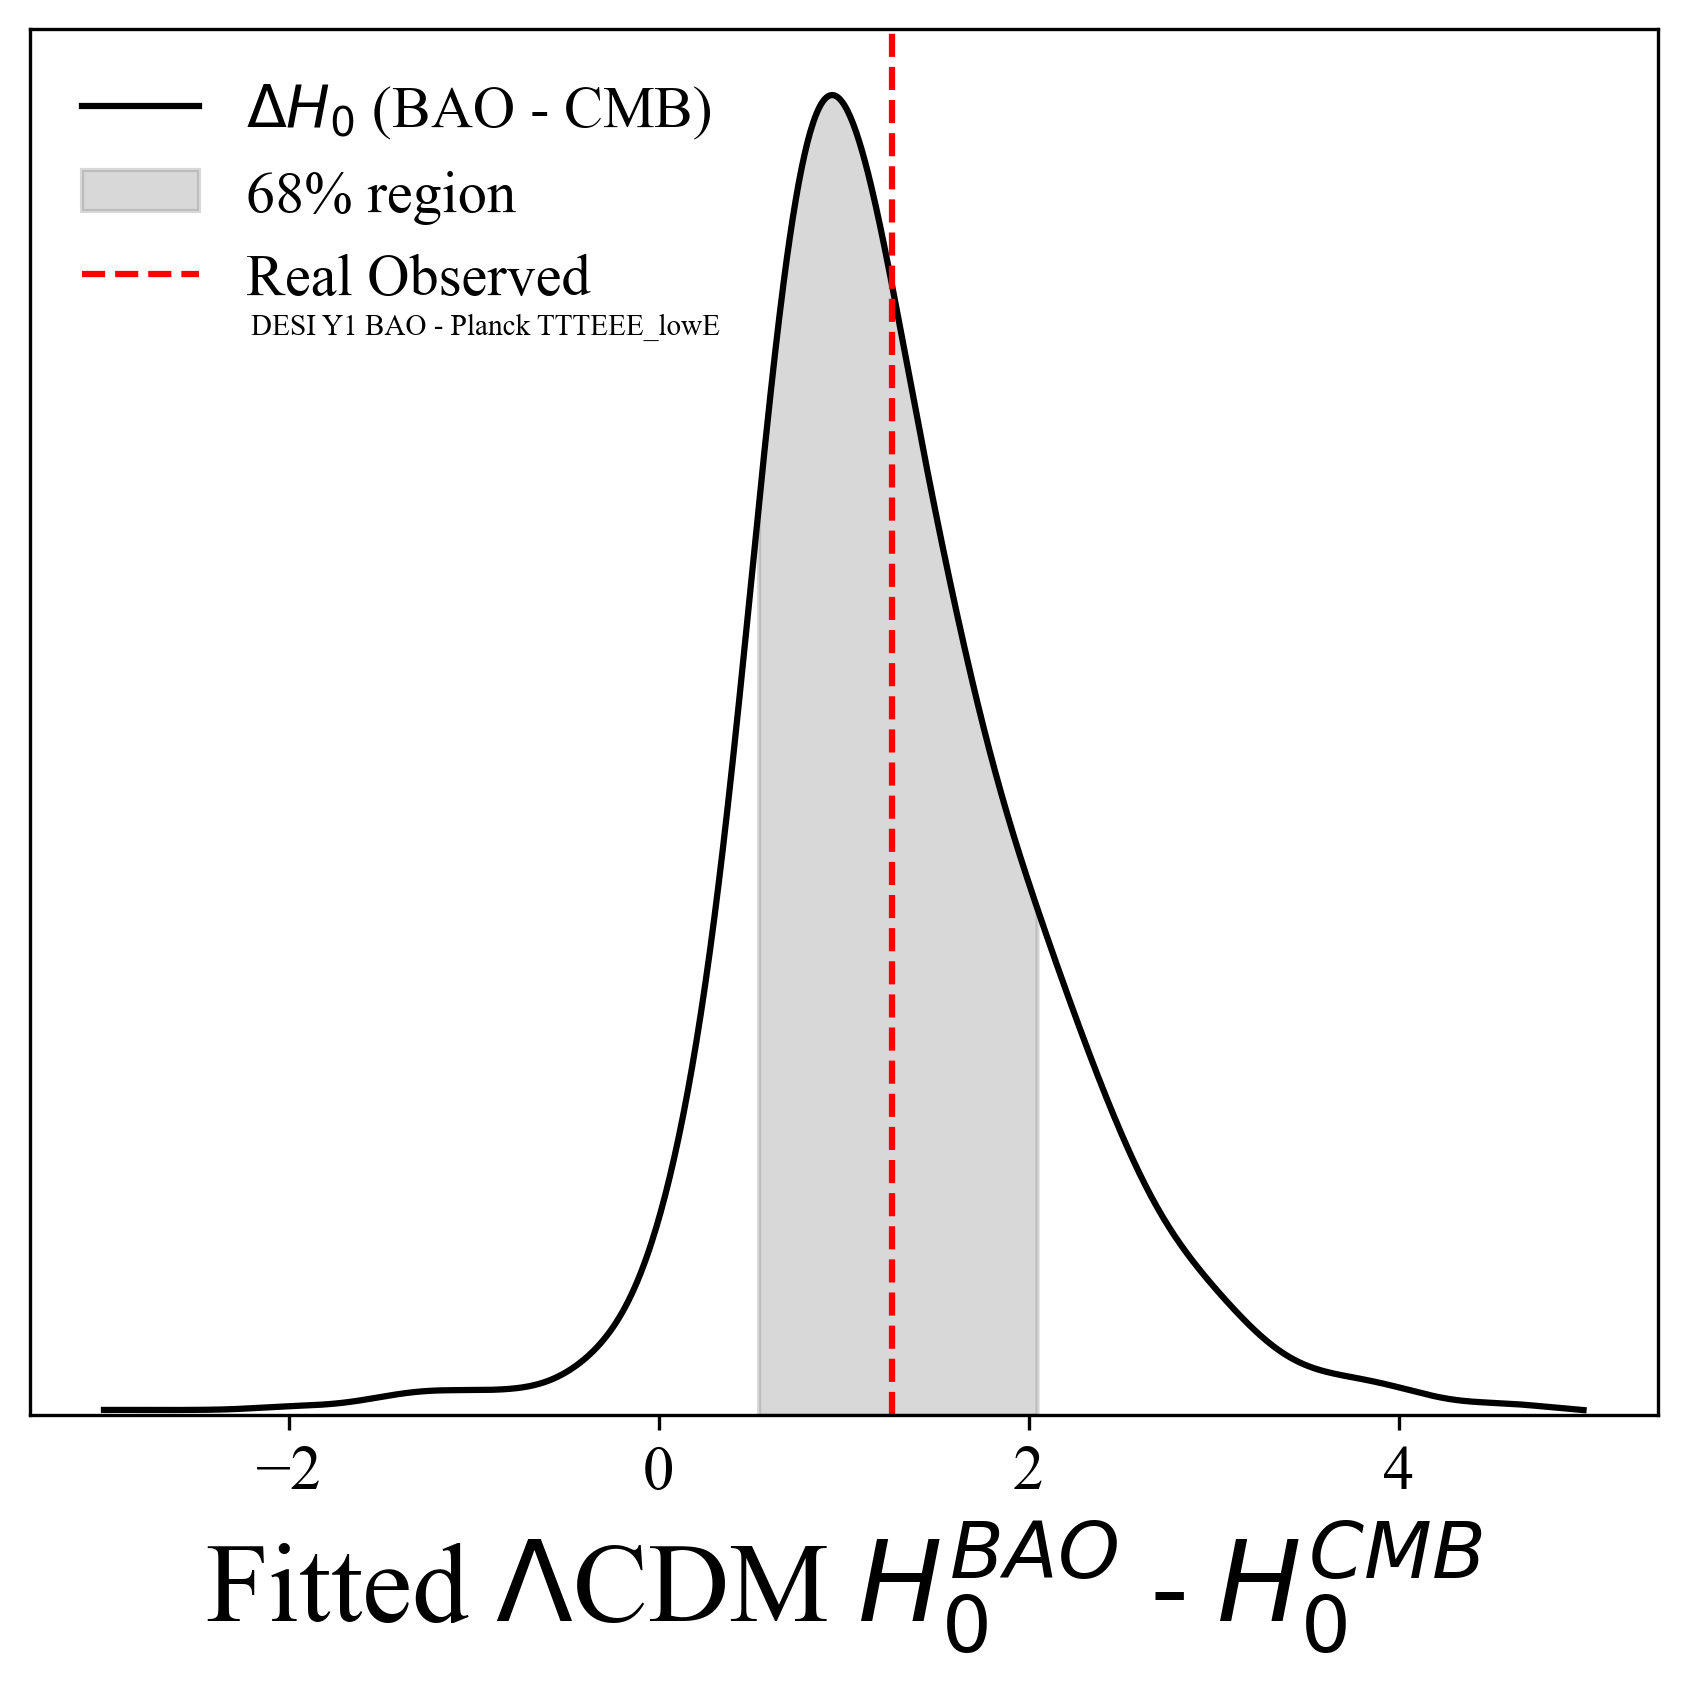

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gaussian_kde

def calculate_delta_h0_distributions(x, h0_min_bao, h0_min_cmb, h0_std_bao, h0_std_cmb):
    total_distribution = np.zeros_like(x)
    delta_mu = []

    for mu_bao, mu_cmb, sigma_bao, sigma_cmb in zip(h0_min_bao, h0_min_cmb, h0_std_bao, h0_std_cmb):
        delta = mu_bao - mu_cmb
        delta_mu.append(delta)
        sigma = np.sqrt(sigma_bao ** 2 + sigma_cmb ** 2)
        # Weight inversely proportional to the variance
        weight = 1 / sigma**2
        total_distribution += weight * norm.pdf(x, delta, sigma)

    # Normalize total_distribution
    total_distribution /= np.trapz(total_distribution, x)

    return total_distribution, delta_mu

import numpy as np
import pickle

# Load the data
with open('data/results_for_h_omm_with_snecov_correct_obh2_marginalH0.pkl', 'rb') as f:
    loaded_results = pickle.load(f)

# Extract the data
h0_min_sne = loaded_results["h0_min_sne"]
omm_min_sne = loaded_results["omm_min_sne"]
h0_std_sne = loaded_results["h0_std_sne"]
omm_std_sne = loaded_results["omm_std_sne"]
h0_min_bao = loaded_results["h0_min_bao"]
omm_min_bao = loaded_results["omm_min_bao"]
h0_std_bao = loaded_results["h0_std_bao"]
omm_std_bao = loaded_results["omm_std_bao"]
h0_min_cmb = loaded_results["h0_min_cmb"]
omm_min_cmb = loaded_results["omm_min_cmb"]
h0_std_cmb = loaded_results["h0_std_cmb"]
omm_std_cmb = loaded_results["omm_std_cmb"]
param = loaded_results["param"]

h0_min_bao = np.array(h0_min_bao)
h0_min_cmb = np.array(h0_min_cmb)
h0_std_bao = np.array(h0_std_bao)
h0_std_cmb = np.array(h0_std_cmb)

nan_mask = np.isnan(h0_min_bao) | np.isnan(h0_min_cmb) | np.isnan(h0_std_bao) | np.isnan(h0_std_cmb)

h0_min_bao[nan_mask] = np.nan
h0_min_cmb[nan_mask] = np.nan
h0_std_bao[nan_mask] = np.nan
h0_std_cmb[nan_mask] = np.nan

h0_min_bao = h0_min_bao[np.isfinite(h0_min_bao)]
h0_min_cmb = h0_min_cmb[np.isfinite(h0_min_cmb)]
h0_std_bao = h0_std_bao[np.isfinite(h0_std_bao)]
h0_std_cmb = h0_std_cmb[np.isfinite(h0_std_cmb)]

print(len(h0_min_bao),len(h0_min_cmb),len(h0_std_bao),len(h0_std_cmb))

def plot_delta_h0(dataname, h0_min_bao, h0_min_cmb, h0_std_bao, h0_std_cmb, x_vals=np.linspace(-3, 5, 1000)):
    y_vals, delta_mu = calculate_delta_h0_distributions(x_vals, h0_min_bao, h0_min_cmb, h0_std_bao, h0_std_cmb)
    y_vals /= np.trapz(y_vals, x_vals)  # Normalize the distribution

    # Plot the mixture distribution
    # Plot histogram of delta_mu
   # plt.figure()
    #plt.hist(delta_mu, bins=30, density=True, alpha=0.6, color='g')
  #  plt.title('Histogram of Delta Mu')
 #   plt.xlabel(r'$\Delta H_0$')
 #   plt.ylabel('Density')
  #  plt.show()
#
    return delta_mu

# Plot the data
delta_mu=plot_delta_h0('', h0_min_bao, h0_min_cmb, h0_std_bao, h0_std_cmb)

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

delta_mu = np.array(delta_mu)
sigma_bao = np.array(h0_std_bao)
sigma_cmb = np.array(h0_std_cmb)
delta_sigma = np.sqrt(sigma_bao**2 + sigma_cmb**2)

weights = 1 / delta_sigma**2

weights /= np.sum(weights)

x_vals = np.linspace(-3, 5, 1000)

kde = gaussian_kde(delta_mu, weights=weights)
y_vals = kde(x_vals)

y_vals /= np.trapz(y_vals, x_vals)
cdf = np.cumsum(y_vals) * (x_vals[1] - x_vals[0])

lower_idx = np.searchsorted(cdf, 0.16)
upper_idx = np.searchsorted(cdf, 0.84)
x_lower, x_upper = x_vals[lower_idx], x_vals[upper_idx]

peak_idx = np.argmax(y_vals)
peak_x = x_vals[peak_idx]
peak_y = y_vals[peak_idx]

print(f"Peak of the KDE: x = {peak_x:.4f}, y = {peak_y:.4f}")

print(f"68% confidence interval: {x_lower:.4f} to {x_upper:.4f}")
plt.figure(figsize=(7, 6), dpi=300)
plt.plot(x_vals, y_vals, color='black', label=r'$\Delta H_0$ (BAO - CMB)')


plt.fill_between(x_vals[lower_idx:upper_idx+1], y_vals[lower_idx:upper_idx+1],
                 color='gray', alpha=0.3, label='68% region')
plt.axvline(68.53 - 67.27, color='red', linestyle='--', label='Real Observed')

#for spine in ['top', 'left', 'right']:
  #  plt.gca().spines[spine].set_visible(False)

plt.xlabel(r'Fitted $\Lambda$CDM $H_0^{BAO}$ - $H_0^{CMB}$', fontsize=27)
plt.ylim(0, None)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.set_yticklabels([])
legend = plt.legend(fontsize=14, loc='upper left')
legend.get_frame().set_linewidth(0)  # Remove the box outline
legend.get_frame().set_facecolor('none')  # Make the background transparent

plt.text(0.28, 0.78, r'DESI Y1 BAO - Planck TTTEEE_lowE', fontsize=7, ha='center', transform=plt.gca().transAxes)
#plt.ylabel('$H_0^{BAO}$ - $H_0^{CMB}$', fontsize=20)

plt.grid(False)
plt.savefig('delta_h0_plot_all_together.png', format='png', dpi=900, bbox_inches='tight')
plt.show()


Peak of the KDE: x = 1.0200, y = 0.4864
68% confidence interval: 0.5235 to 2.2613

In [7]:
low=1.02-0.5235
high=2.2613-1.02
low, high

(0.49650000000000005, 1.2412999999999998)

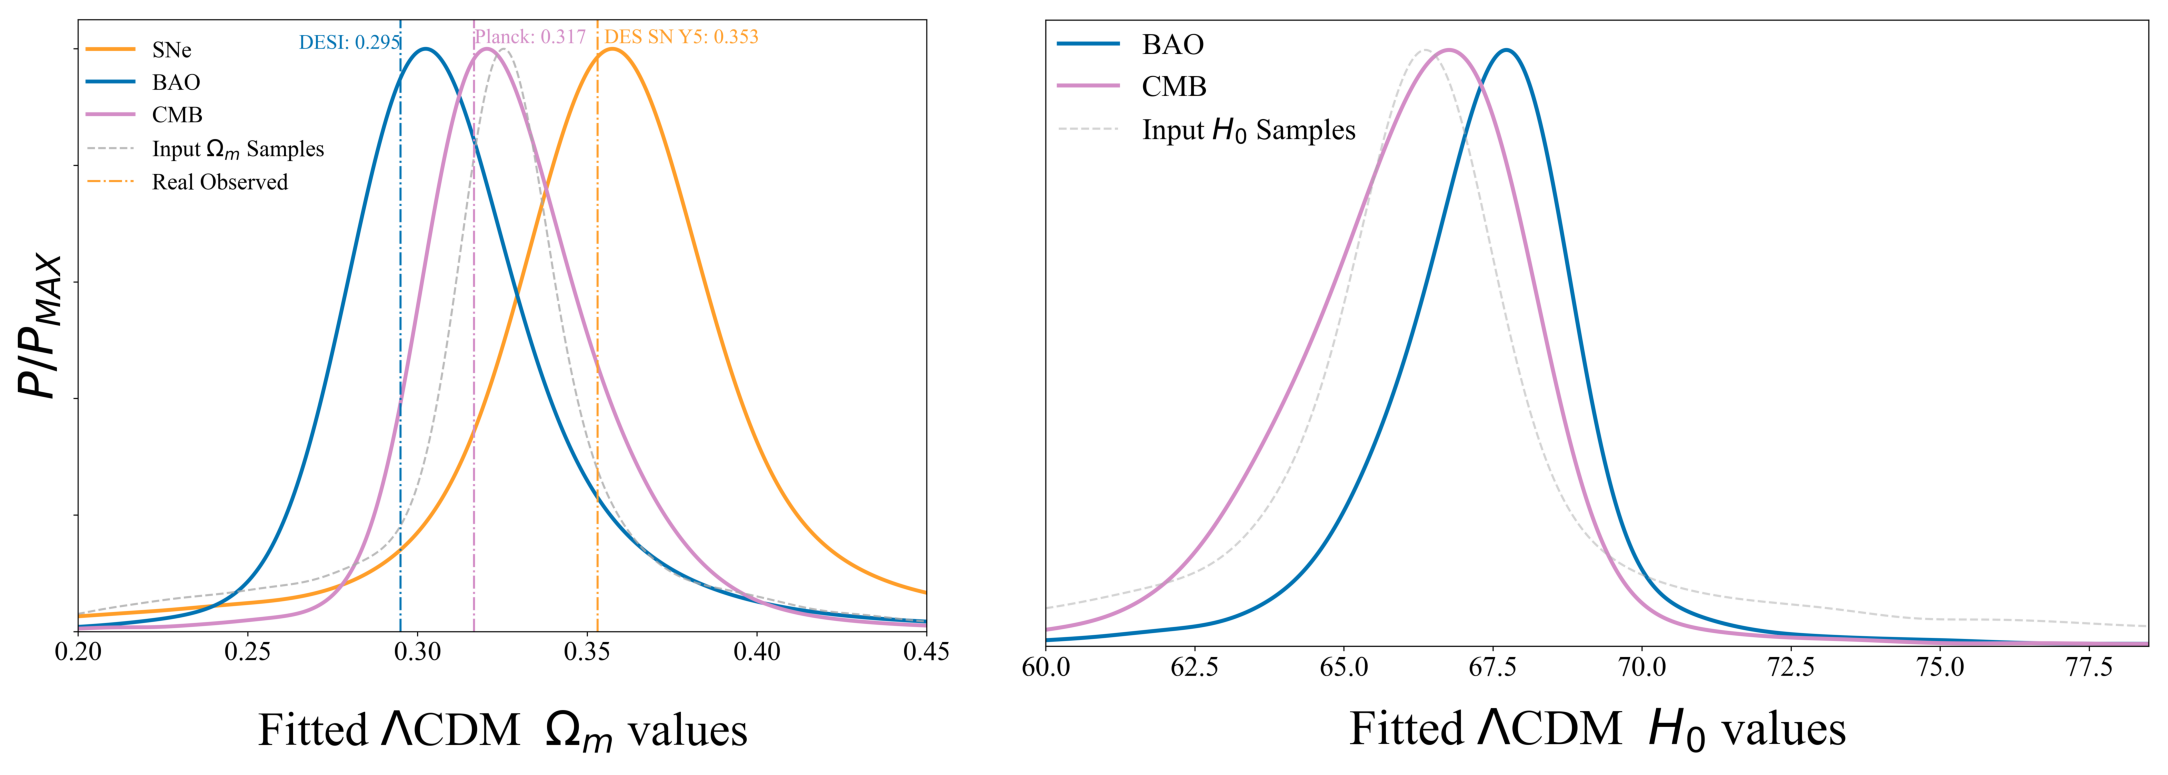

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img1 = mpimg.imread('w0wa_to_lcdm_all_correct_bbn.png')
img2 = mpimg.imread('H0_cmb_bao_correct_bbn.png')

fig, axes = plt.subplots(1, 2, figsize=(24, 8))

axes[0].imshow(img1)
axes[0].axis('off')

axes[1].imshow(img2)
axes[1].axis('off')
plt.subplots_adjust(wspace=-0.2)
plt.tight_layout()
fig.savefig('domm_H0_cmb_bao_correct_bbn.png', dpi=700, bbox_inches='tight')
plt.show()

0.08152373861163096647^{+0.06934551843427731732}_{-0.08149130518773396725}
Approximately 51.68% of the simulated $w_0w_a$CDM cosmologies have $p$-values smaller than the observed $p$-value ($p$ < 0.0349054638642331).


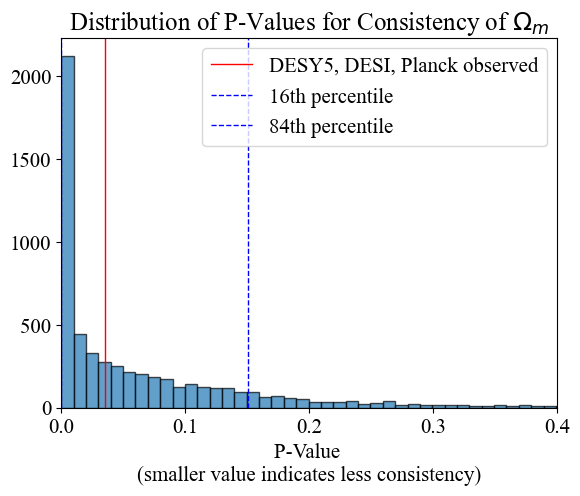

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import chi2

def calculate_p_for_the_same_omm(omm_min_sne, omm_std_sne, omm_min_bao, omm_std_bao, omm_min_cmb, omm_std_cmb):
    weights_single = 1 / np.array([omm_std_sne**2, omm_std_bao**2, omm_std_cmb**2])
    omm_common_single = np.sum(np.array([omm_min_sne, omm_min_bao, omm_min_cmb]) * weights_single) / np.sum(weights_single)

    chi_squared_single = ((omm_min_sne - omm_common_single)**2 / omm_std_sne**2 +
                          (omm_min_bao - omm_common_single)**2 / omm_std_bao**2 +
                          (omm_min_cmb - omm_common_single)**2 / omm_std_cmb**2)
    dof = 2
    p_value_single = 1 - chi2.cdf(chi_squared_single, dof)
   # chis=chi2.cdf(chi_squared_single, dof)
    #p_consistent = 1 - p_value_single

    return p_value_single


omm_min_sne = np.array(omm_min_sne)
omm_std_sne = np.array(omm_std_sne)
omm_min_bao = np.array(omm_min_bao)
omm_std_bao = np.array(omm_std_bao)
omm_min_cmb = np.array(omm_min_cmb)
omm_std_cmb = np.array(omm_std_cmb)

p_values = np.array([calculate_p_for_the_same_omm(omm_min_sne[i], omm_std_sne[i],
                                                  omm_min_bao[i], omm_std_bao[i],
                                                  omm_min_cmb[i], omm_std_cmb[i])
                     for i in range(len(omm_min_sne))])

p_values_filtered = p_values[~np.isnan(p_values)]

lower_bound = np.percentile(p_values_filtered, 16)
upper_bound = np.percentile(p_values_filtered, 84)

mean_p_value = np.mean(p_values_filtered)

upper_deviation = upper_bound - mean_p_value
lower_deviation = mean_p_value - lower_bound

print(f"{mean_p_value:.20f}^{{+{upper_deviation:.20f}}}_{{-{lower_deviation:.20f}}}")

a = calculate_p_for_the_same_omm(omm_min_sne=0.353, omm_std_sne=0.017, omm_min_bao=0.295, omm_std_bao=0.015, omm_min_cmb=0.315, omm_std_cmb=0.007)
plt.xlim(0, 0.4)
plt.hist(p_values_filtered, bins=100, edgecolor='black', alpha=0.7)

plt.axvline(a, color='red', linestyle='-', linewidth=1, label='DESY5, DESI, Planck observed')

plt.axvline(lower_bound, color='blue', linestyle='--', linewidth=1, label='16th percentile')
plt.axvline(upper_bound, color='blue', linestyle='--', linewidth=1, label='84th percentile')
fraction_below_observed = np.sum(p_values_filtered < a) / len(p_values_filtered)

percentage_below_observed = fraction_below_observed * 100

print(f"Approximately {percentage_below_observed:.2f}% of the simulated $w_0w_a$CDM cosmologies have $p$-values smaller than the observed $p$-value ($p$ < {a}).")
plt.xlabel("P-Value \n(smaller value indicates less consistency)")
plt.title("Distribution of P-Values for Consistency of $\Omega_m$")
plt.legend()
plt.show()

In [10]:
fraction_above_05 = np.sum(p_values_filtered > 0.5) / len(p_values_filtered)

percentage_above_05 = fraction_above_05 * 100

# Print the percentage
print(f"Approximately {percentage_above_05:.2f}% of the simulated cosmologies have $p$ > 0.5.")

Approximately 2.55% of the simulated cosmologies have $p$ > 0.5.


In [11]:
print(len(h0_min_bao), len(h0_min_cmb), len(h0_std_bao), len(h0_std_cmb))

5969 5969 5969 5969


Peak for BAO: x = 67.72, y = 0.2842
Peak for CMB: x = 66.76, y = 0.2188
delta_mu shape: (5969,)
weights shape: (5969,)


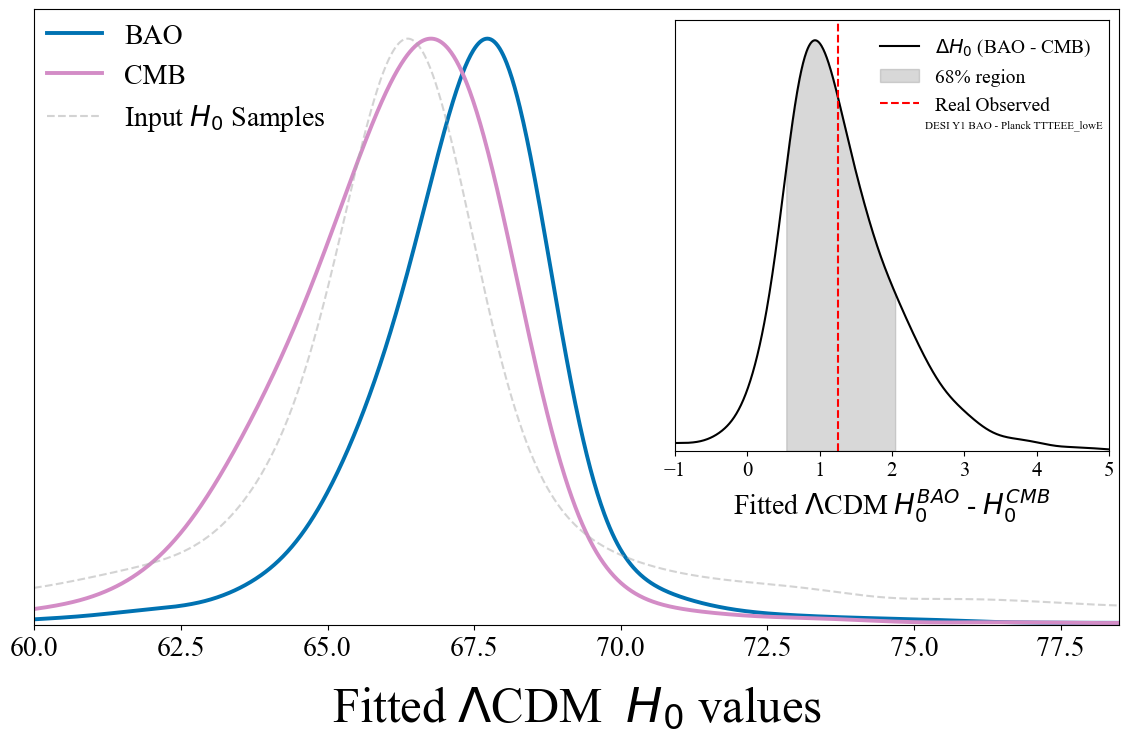

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gaussian_kde


plt.figure(figsize=(14, 8))

bao_distribution = calculate_h0_distributions(
    x_values, h0_min_bao_all, h0_bao_std,
    label=r'BAO', color='#0072B2'
)
cmb_distribution = calculate_h0_distributions(
    x_values, h0_min_cmb_with_cmb, h0_cmb_std,
    label=r'CMB', color='#d38cc6'
)

kde_original = kde_h0_original(x_values)
kde_original_plot = kde_original / np.max(kde_original)
plt.plot(
    x_values, kde_original_plot,
    color='#A9A9A9', linestyle='--', label=r"Input $H_0$ Samples", alpha=0.5,
)

plt.xlim(60, 78.5)
plt.xlabel('Fitted $\Lambda$CDM  $H_0$ values', fontsize=35)
plt.ylabel('$P/P_{MAX}$', fontsize=20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.tick_params(axis='x', labelsize=20)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.set_yticklabels([])
legend = plt.legend(fontsize=20, loc=(0.001, 0.78))
legend.get_frame().set_linewidth(0)  # Remove the box outline
legend.get_frame().set_facecolor('none')
plt.grid(False)
plt.ylim(0, None)

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

ax_inset = inset_axes(plt.gca(), width="40%", height="70%", loc="upper right")
delta_mu = plot_delta_h0('', h0_min_bao, h0_min_cmb, h0_std_bao, h0_std_cmb)
delta_mu = np.array(delta_mu)
sigma_bao = np.array(h0_std_bao)
sigma_cmb = np.array(h0_std_cmb)
delta_sigma = np.sqrt(sigma_bao**2 + sigma_cmb**2)
weights = 1 / delta_sigma**2
weights /= np.sum(weights)
print(f"delta_mu shape: {delta_mu.shape}")
print(f"weights shape: {weights.shape}")

x_vals = np.linspace(-3, 5, 1000)
kde = gaussian_kde(delta_mu, weights=weights)
y_vals = kde(x_vals)
y_vals /= np.trapz(y_vals, x_vals)
cdf = np.cumsum(y_vals) * (x_vals[1] - x_vals[0])
lower_idx = np.searchsorted(cdf, 0.16)
upper_idx = np.searchsorted(cdf, 0.84)
x_lower, x_upper = x_vals[lower_idx], x_vals[upper_idx]

ax_inset.plot(x_vals, y_vals, color='black', label=r'$\Delta H_0$ (BAO - CMB)')
ax_inset.fill_between(x_vals[lower_idx:upper_idx+1], y_vals[lower_idx:upper_idx+1],
                      color='gray', alpha=0.3, label='68% region')
ax_inset.axvline(68.53 - 67.27, color='red', linestyle='--', label='Real Observed')
ax_inset.set_xlabel(r'Fitted $\Lambda$CDM $H_0^{BAO}$ - $H_0^{CMB}$', fontsize=20)
ax_inset.axes.get_yaxis().set_visible(False)
ax_inset.set_ylim(0, None)
ax_inset.axes.set_yticklabels([])
ax_inset.legend(fontsize=14, loc='upper right', frameon=False)
ax_inset.set_xlim(-1, 5)
ax_inset.grid(False)
legend.get_frame().set_linewidth(0)
legend.get_frame().set_facecolor('none')

plt.text(0.78, 0.75, r'DESI Y1 BAO - Planck TTTEEE_lowE', fontsize=8, ha='center', transform=plt.gca().transAxes)
plt.savefig("H0_cmb_bao_with_delta_inset.png", dpi=400, bbox_inches='tight')
plt.show()


Peak KDE $w_0w_a$ public chain $= 0.33$
Peak for SNe: x = 0.3575, y = 1.0000
Peak for BAO: x = 0.3025, y = 1.0000
Peak for CMB: x = 0.3205, y = 1.0000
Peak for BAO: x = 67.73, y = 0.2885
Peak for CMB: x = 66.77, y = 0.2230


/var/folders/2d/zqs_vr2n65q9fsqw5kq8wmqw0000gn/T/ipykernel_28758/346224346.py:135: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


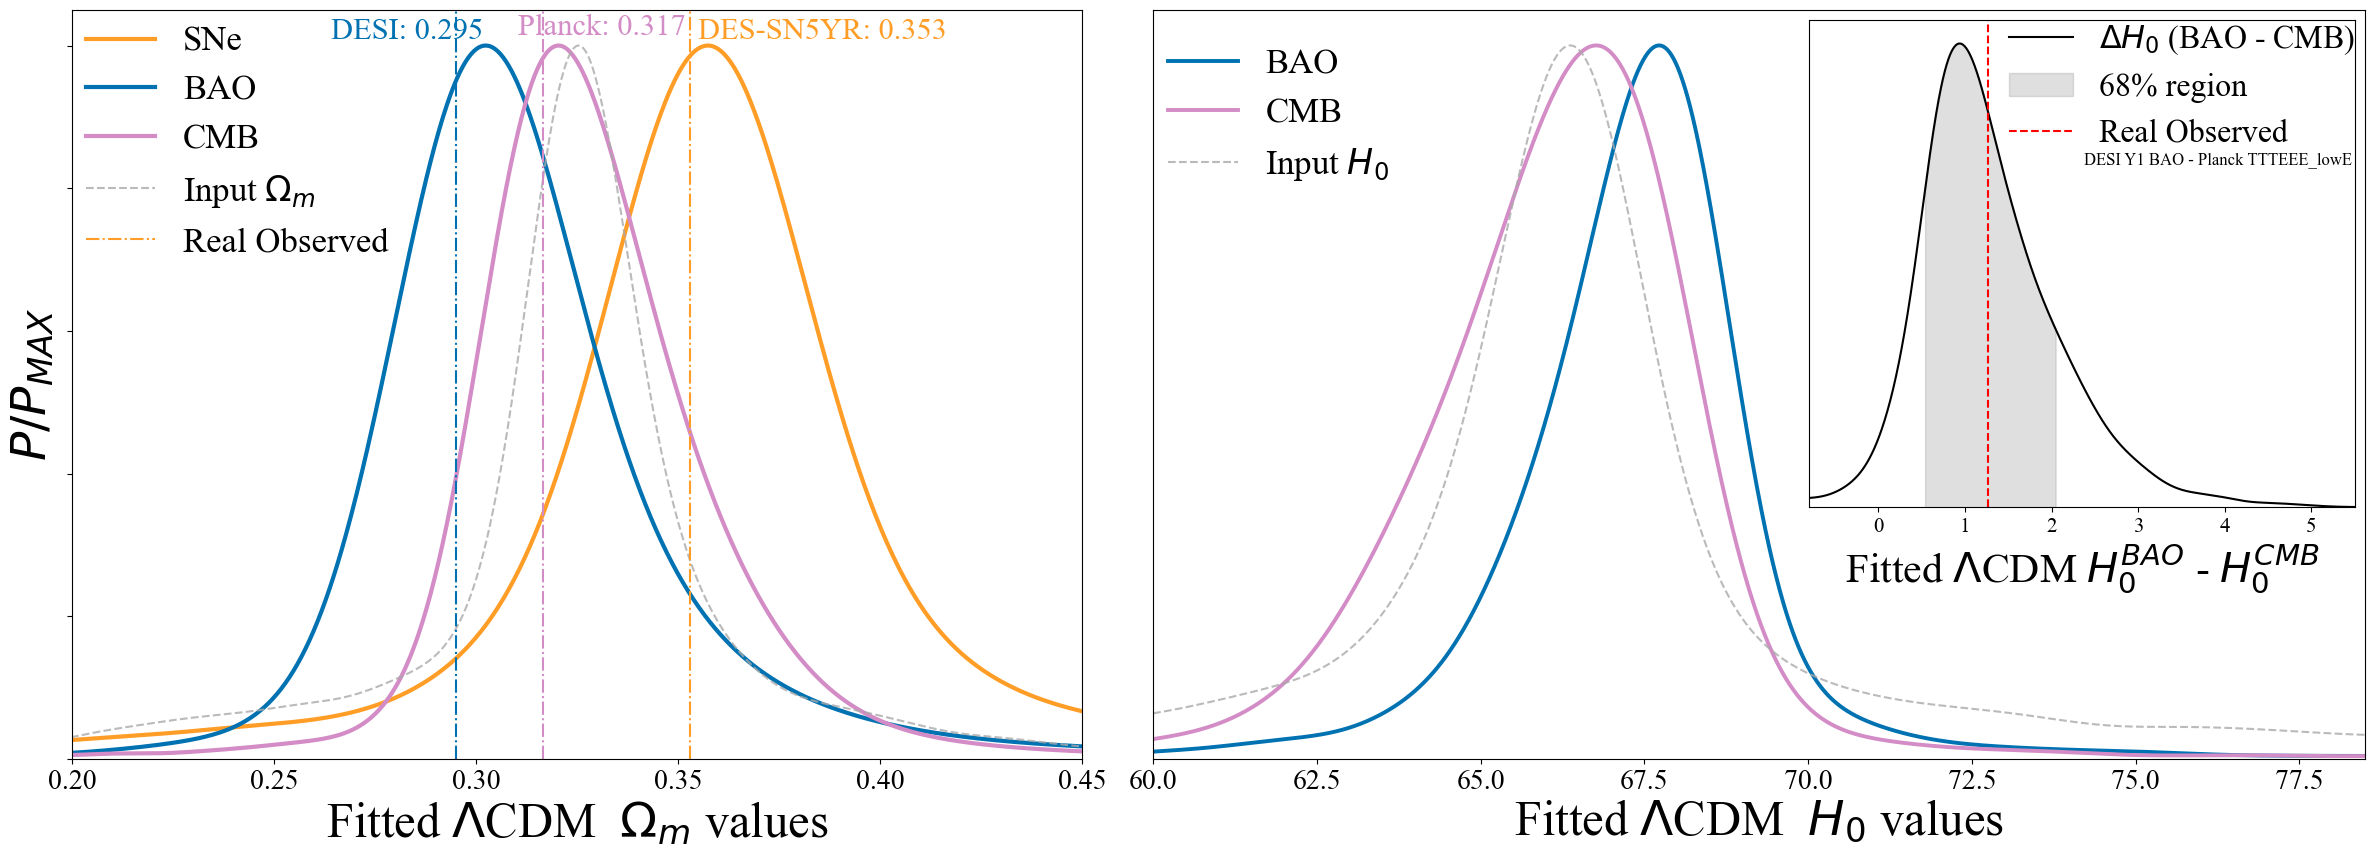

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gaussian_kde
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pickle

def calculate_om0_distributions(x, omm_min, omm_std, label, color):
    total_distribution = np.zeros_like(x)
    for mu, sigma in zip(omm_min, omm_std):
        if not np.isnan(mu) and not np.isnan(sigma):
            total_distribution += norm.pdf(x, mu, sigma)
    total_distribution /= np.max(total_distribution)
    plt.plot(x, total_distribution, label=label, color=color, linewidth=3.0)
    peak_index = np.argmax(total_distribution)
    peak_x_value = x[peak_index]
    peak_y_value = total_distribution[peak_index]
    print(f"Peak for {label}: x = {peak_x_value:.4f}, y = {peak_y_value:.4f}")
    return total_distribution

def calculate_h0_distributions(x, h0_min, h0_std, label, color):
    total_distribution = np.zeros_like(x)
    for mu, sigma in zip(h0_min, h0_std):
        if not np.isnan(mu) and not np.isnan(sigma):
            total_distribution += norm.pdf(x, mu, sigma)
    dx = x[1] - x[0]
    area = np.sum(total_distribution) * dx
    total_distribution /= area
    total_distribution_plot = total_distribution / np.max(total_distribution)
    plt.plot(x, total_distribution_plot, label=label, color=color, linewidth=2.8)
    peak_index = np.argmax(total_distribution)
    peak_x_value = x[peak_index]
    peak_y_value = total_distribution[peak_index]
    print(f"Peak for {label}: x = {peak_x_value:.2f}, y = {peak_y_value:.4f}")
    return total_distribution

fig, axs = plt.subplots(1, 2, figsize=(24, 9), gridspec_kw={'width_ratios': [1, 1.2]})

plt.sca(axs[0])
x = np.linspace(0.1, 0.6, 1500)

omm_oringinal_with_cmb_array = np.array(omm_oringinal_list_with_cmb)
omm_oringinal_array = omm_oringinal_with_cmb_array[np.isfinite(omm_oringinal_with_cmb_array)]
kde_omm_oringinal = gaussian_kde(omm_oringinal_array)
peak_omm_oringinal = x[np.argmax(kde_omm_oringinal(x))]
print(f"Peak KDE $w_0w_a$ public chain $= {peak_omm_oringinal:.2f}$")

plt.rc('font', family='serif', serif='Times New Roman', size=15)
plt.rcParams['axes.labelsize'] = 15

sne_distribution = calculate_om0_distributions(x, omm_min_sne, omm_std_sne, label='SNe', color='#ff9d27')
bao_distribution = calculate_om0_distributions(x, omm_min_bao, omm_std_bao, label='BAO', color='#0072B2')
cmb_distribution = calculate_om0_distributions(x, omm_min_cmb, omm_std_cmb, label='CMB', color='#d38cc6')

plt.plot(x, kde_omm_oringinal(x) / kde_omm_oringinal(peak_omm_oringinal), color='#A9A9A9', linestyle='--',
         label=r"Input $\Omega_m$", alpha=0.8)
plt.axvline(0.353, color='#ff9d27', linestyle='dashdot', linewidth=1.5, label='Real Observed')
plt.text(0.355, max(sne_distribution) * 1.01, 'DES-SN5YR: 0.353', color='#ff9d27', fontsize=22)
plt.axvline(0.295, color='#0072B2', linestyle='dashdot', linewidth=1.5)
plt.text(0.264, max(bao_distribution)*1.01, 'DESI: 0.295', color='#0072B2', fontsize=22)
plt.axvline(0.3166, color='#d38cc6', linestyle='dashdot', linewidth=1.5)
plt.text(0.3105, max(cmb_distribution) *1.015, 'Planck: 0.317', color='#d38cc6', fontsize=22)
plt.xlim(0.2, 0.45)
plt.ylim(0, None)
plt.xlabel('Fitted $\Lambda$CDM  $\Omega_{m}$ values', fontsize=35)
plt.ylabel('$P/P_{MAX}$', fontsize=35)
plt.tick_params(axis='x', labelsize=20)
plt.gca().axes.set_yticklabels([])
legend = plt.legend(fontsize=25, loc=(0, 0.65))
legend.get_frame().set_linewidth(0)
legend.get_frame().set_facecolor('none')
plt.grid(False)

plt.sca(axs[1])
x_values = np.linspace(60, 78.5, 2000)

bao_distribution = calculate_h0_distributions(
    x_values, h0_min_bao_all, h0_bao_std,
    label=r'BAO', color='#0072B2'
)
cmb_distribution = calculate_h0_distributions(
    x_values, h0_min_cmb_with_cmb, h0_cmb_std,
    label=r'CMB', color='#d38cc6'
)

kde_original = kde_h0_original(x_values)
kde_original_plot = kde_original / np.max(kde_original)
plt.plot(
    x_values, kde_original_plot,
    color='#A9A9A9', linestyle='--', label=r"Input $H_0$", alpha=0.8
)

plt.xlim(60, 78.5)
plt.ylim(0, None)
plt.xlabel('Fitted $\Lambda$CDM  $H_0$ values', fontsize=35)
plt.tick_params(axis='x', labelsize=20)
plt.gca().axes.get_yaxis().set_visible(False)
legend = plt.legend(fontsize=25, loc=(0.001, 0.75))
legend.get_frame().set_linewidth(0)
legend.get_frame().set_facecolor('none')
plt.grid(False)


ax_inset = inset_axes(plt.gca(), width="45%", height="65%", loc="upper right")
delta_mu = plot_delta_h0('', h0_min_bao, h0_min_cmb, h0_std_bao, h0_std_cmb)
delta_mu = np.array(delta_mu)
sigma_bao = np.array(h0_std_bao)
sigma_cmb = np.array(h0_std_cmb)
delta_sigma = np.sqrt(sigma_bao**2 + sigma_cmb**2)
weights = 1 / delta_sigma**2
weights /= np.sum(weights)
x_vals = np.linspace(-3, 8, 2000)
kde = gaussian_kde(delta_mu, weights=weights)
y_vals = kde(x_vals)
y_vals /= np.trapz(y_vals, x_vals)
cdf = np.cumsum(y_vals) * (x_vals[1] - x_vals[0])
lower_idx = np.searchsorted(cdf, 0.16)
upper_idx = np.searchsorted(cdf, 0.84)
x_lower, x_upper = x_vals[lower_idx], x_vals[upper_idx]

ax_inset.plot(x_vals, y_vals, color='black', label=r'$\Delta H_0$ (BAO - CMB)')
ax_inset.fill_between(x_vals[lower_idx:upper_idx + 1], y_vals[lower_idx:upper_idx + 1],
                      color='gray', alpha=0.25, label='68% region')
ax_inset.axvline(68.53 - 67.27, color='red', linestyle='--', label='Real Observed')
ax_inset.set_xlabel(r'Fitted $\Lambda$CDM $H_0^{BAO}$ - $H_0^{CMB}$', fontsize=30)
ax_inset.axes.get_yaxis().set_visible(False)
ax_inset.set_ylim(0, None)
ax_inset.axes.set_yticklabels([])
ax_inset.legend(fontsize=23, loc= (0.343,0.71), frameon=False)
ax_inset.text(0.75, 0.705, r'DESI Y1 BAO - Planck TTTEEE_lowE', fontsize=12, ha='center', transform=plt.gca().transAxes)

ax_inset.set_xlim(-0.8, 5.5)
ax_inset.grid(False)

plt.tight_layout()
plt.savefig("combined_plot.png", dpi=700, bbox_inches='tight')
plt.show()
